### Load Data and Extract Peaks

In [1]:
%pip install numpy
%pip install matplotlib
%pip install scipy
%pip install pylab

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pylab (from versions: none)
ERROR: No matching distribution found for pylab
Note: you may need to restart the kernel to use updated packages.


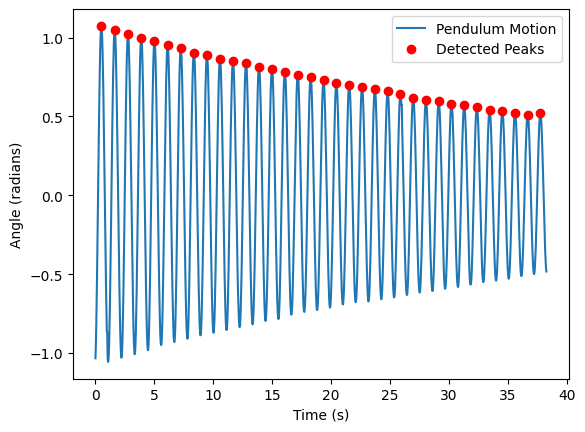

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Example data (replace this with your actual data)
from pylab import loadtxt

def load_data(filename):
    data=loadtxt(filename, usecols=(0,1,2,3), skiprows=1, unpack=True)
    return data

data = load_data("decaydata.txt")
time = data[0] #x
angles = data[1] #y

# Find peaks (local maxima)
peaks, _ = find_peaks(angles)

# Extract time and angle values at the peaks
peak_times = time[peaks]
peak_angles = angles[peaks]

# Plot to verify
plt.plot(time, angles, label='Pendulum Motion')
plt.plot(peak_times, peak_angles, 'ro', label='Detected Peaks')
plt.title("Peak Detector")
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.legend()
plt.show()

### Find exponential decay with peaks

In [3]:
from scipy.optimize import curve_fit

# Exponential decay model
def exp_decay(t, theta_0, tau):
    return theta_0 * np.exp(-t / tau)

# Fit the exponential decay to the peak data
params, covariance = curve_fit(exp_decay, peak_times, peak_angles)

theta_0, tau = params  # Extract theta_0 (initial amplitude) and tau (decay constant)

print(round(theta_0, 3), round(tau, 3))

1.0808867267134377 49.32008773102704


### Find the Q-Factor:

In [50]:
L = 0.253 #meters
T = 2 * np.sqrt(L)

Q = np.pi * (tau/T)
Q = int(round(Q, 0))
print(Q)


154


### Plot:

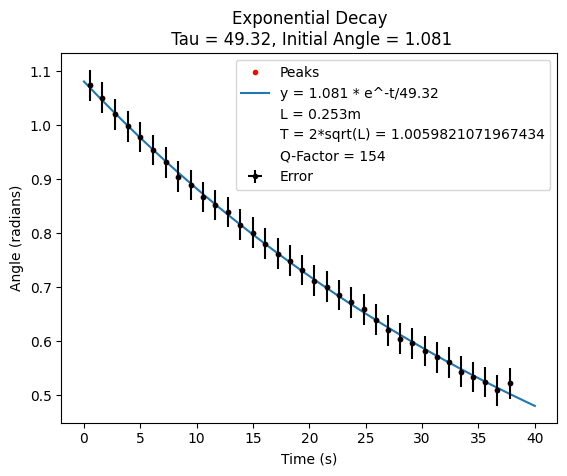

In [51]:
# Plot exponential decay
plt.plot(peak_times, peak_angles, 'ro', markersize=3, label='Peaks')

# Generate the line
x = np.linspace(0, 40, 400) # 400 points between 0, 40 (domain of our graph)
y = exp_decay(x, theta_0, tau)
plt.plot(x, y, label=f'y = {round(theta_0, 3)} * e^-t/{round(tau, 3)}')

# Constants
plt.plot([], [], ' ', label=f'L = {L}m')
plt.plot([], [], ' ', label=f'T = 2*sqrt(L) = {T}')
plt.plot([], [], ' ', label=f'Q-Factor = {int(round(Q, 0))}')

# Graph
plt.title(f"Exponential Decay\n Tau = {round(tau, 3)}, Initial Angle = {round(theta_0, 3)}")
plt.errorbar(peak_times, peak_angles, xerr=0.001, yerr=np.std(peak_angles)/np.sqrt(peak_angles.shape[0]), fmt='.', label="Error", color="black")
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.legend()
plt.show()